# Explicit Solution

## Notes:
* Parabolic PDEs are of the form $Au_{xx}+2Bu_{xy}+Cu_{yy}+Du_{x}+Eu_{y}+F=0$
    * must satisfy $B^{2}-AC=0$
    
* Solving out $\frac{\partial T}{\partial t}=\alpha \frac{\partial^{2}T}{\partial t^{2}}$ with the following constraint: $\sigma = \alpha\frac{\Delta t}{(\Delta x)^{2}} \leq \frac{1}{2}$

* Descritizing the time derivative: $$\frac{\partial T}{\partial t} : T^{n+1}_{i} = T^{n}_{i} + \frac{\partial T}{\partial t}\Delta t + \frac{\partial^{2} T}{\partial t^{2}}\frac{\Delta t^{2}}{2} + \frac{\partial^{3} T}{\partial t^{3}}\frac{\Delta t^{3}}{6} \\
\implies \frac{T^{n+1}_{i} - T^{n}_{i}}{\Delta t} = \frac{\partial T}{\partial t} + \frac{\partial^{2} T}{\partial t^{2}}\frac{\Delta t}{2} + \frac{\partial^{3} T}{\partial t^{3}}\frac{\Delta t^{2}}{6}$$
    * Using big-O notation for the error we get : $$\frac{T^{n+1}_{i} - T^{n}_{i}}{\Delta t} = \frac{\partial T}{\partial t} + O(\Delta t)$$
    
* Descritizing the space derivative, we will use central difference, which will give us two equations to then later sum:
$$\frac{\partial^{2} T}{\partial x^{2}} :\begin{align}
&T^{n}_{i+1} = T^{n}_{i} + \frac{\partial T}{\partial x}\Delta x + \frac{\partial^{2} T}{\partial x^{2}}\frac{\Delta x^{2}}{2} + \frac{\partial^{3} T}{\partial x^{3}}\frac{\Delta x^{3}}{6} + \frac{\partial^{4} T}{\partial x^{4}}\frac{\Delta x^{4}}{24}\\
&T^{n}_{i-1} = T^{n}_{i} - \frac{\partial T}{\partial x}\Delta x + \frac{\partial^{2} T}{\partial x^{2}}\frac{\Delta x^{2}}{2} - \frac{\partial^{3} T}{\partial x^{3}}\frac{\Delta x^{3}}{6} + \frac{\partial^{4} T}{\partial x^{4}}\frac{\Delta x^{4}}{24}\\
\implies &T^{n}_{i+1} + T^{n}_{i-1} = 2T^{n}_{i} + \frac{\partial^{2} T}{\partial x^{2}}\Delta x^{2} + \frac{\partial^{4} T}{\partial x^{4}}\frac{\Delta x^{4}}{12} \rightarrow \frac{T^{n}_{i+1} + T^{n}_{i-1} - 2T^{n}_{i}}{\Delta x^{2}} = \frac{\partial^{2} T}{\partial x^{2}} + \frac{\partial^{4} T}{\partial x^{4}}\frac{\Delta x^{2}}{12}\end{align}$$
    * Using big-O notation for the error we get : $$\frac{T^{n}_{i+1} + T^{n}_{i-1} - 2T^{n}_{i}}{\Delta x^{2}} = \frac{\partial^{2} T}{\partial x^{2}} + O(\Delta x^{2})$$
    
* this allows the equation to formulate to: $$\frac{T^{n+1}_{i} - T^{n}_{i}}{\Delta t} - O(\Delta t) = \alpha\frac{T^{n}_{i+1} + T^{n}_{i-1} - 2T^{n}_{i}}{\Delta x^{2}} - \alpha O(\Delta x^{2})\\
\implies T^{n+1}_{i} = T^{n}_{i} + \alpha \Delta t \frac{T^{n}_{i+1} + T^{n}_{i-1} - 2T^{n}_{i}}{\Delta x^{2}} + \Delta t [O(\Delta t) - \alpha O(\Delta x^{2})]$$
    * you can ignore the error term and end up with: $$T^{n+1}_{i} = T^{n}_{i} + \alpha \Delta t \frac{T^{n}_{i+1} + T^{n}_{i-1} - 2T^{n}_{i}}{\Delta x^{2}}$$

* Dirichlet : set the value at the boundary

* Neumann : set the derivative at the boundary

* The Boundary for explicit schemes lags behind the solution by one timestep. This isn't accurate for the physics of the problem.

* We can replace the sigma condition into the actual equation and get: $$T^{n+1}_{i} = T^{n}_{i} + \sigma [T^{n}_{i+1} + T^{n}_{i-1} - 2T^{n}_{i}] + \Delta t [O(\Delta t) - \alpha O(\Delta x^{2})]$$
    
    * by ignore the error term again, we get: $$T^{n+1}_{i} = T^{n}_{i} + \sigma [T^{n}_{i+1} + T^{n}_{i-1} - 2T^{n}_{i}]\\ \implies T^{n+1}_{i} = \sigma T^{n}_{i+1} + \sigma T^{n}_{i-1} + (1- 2\sigma)T^{n}_{i}$$

* Based on this weighting, anything greater than $\sigma = \frac{1}{2}$ will allow the current value to detract from the future value. At $\sigma = \frac{1}{2}$ exactly, the future value is only a matter of the steps before and after it - strange but not scary...

## Code: 
all the code will follow this cell. This is to ease runtime and to make sure the scope of all variables remains the same. different iterations of the same code with different values or methods of computing the same solution will be in subsquent cells, while code-notes will be commented like usual.

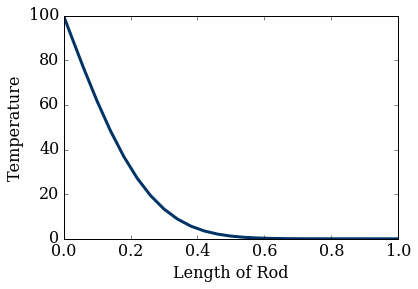

In [10]:
## Basic imports:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

# setting up initial conditions
L = 1
nt = 100
nx = 51
alpha = 1.22e-3
dx = L/(nx-1)
sigma = 1/2 # why was there a double used here?
dt = sigma * dx*dx/alpha

Ti = numpy.zeros(nx)
Ti[0] = 100


# creating forward time central difference in space (ftcs) method
def ftcs(T, nt, dt, dx, alpha):
    for n in range(nt):
        Tn = T.copy() 
        T[1:-1] = Tn[1:-1] + alpha*dt/dx**2*(Tn[2:] -2*Tn[1:-1] + Tn[0:-2])
    return T

T = ftcs(Ti.copy(), nt, dt, dx, alpha)

pyplot.plot(numpy.linspace(0,1,nx), T, color='#003366', ls='-', lw=3)
pyplot.ylim(0,100)
pyplot.xlabel('Length of Rod')
pyplot.ylabel('Temperature');

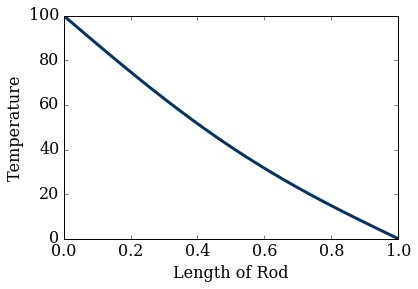

In [11]:
## 1000 time steps instead of 100

## Basic imports:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

# setting up initial conditions
L = 1
nt = 1000
nx = 51
alpha = 1.22e-3
dx = L/(nx-1)
sigma = 1/2 
dt = sigma * dx*dx/alpha

Ti = numpy.zeros(nx)
Ti[0] = 100


# creating forward time central difference in space (ftcs) method
def ftcs(T, nt, dt, dx, alpha):
    for n in range(nt):
        Tn = T.copy() 
        T[1:-1] = Tn[1:-1] + alpha*dt/dx**2*(Tn[2:] -2*Tn[1:-1] + Tn[0:-2])
    return T

T = ftcs(Ti.copy(), nt, dt, dx, alpha)
pyplot.plot(numpy.linspace(0,1,nx), T, color='#003366', ls='-', lw=3)
pyplot.ylim(0,100)
pyplot.xlabel('Length of Rod')
pyplot.ylabel('Temperature');

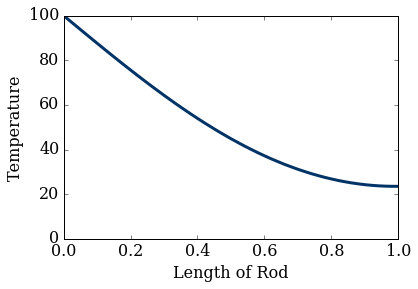

In [12]:
## 1000 time steps instead of 100, and adds in neumann condition by allowing the last solution to be equal to 
## the second-to-last solution - forces the boundary derivative to be 0

## Basic imports:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

# setting up initial conditions
L = 1
nt = 1000
nx = 51
alpha = 1.22e-3
dx = L/(nx-1)
sigma = 1/2 
dt = sigma * dx*dx/alpha

Ti = numpy.zeros(nx)
Ti[0] = 100


# creating forward time central difference in space (ftcs) method
def ftcs_mixed_bc(T, nt, dt, dx, alpha):
    for n in range(nt):
        Tn = T.copy() 
        T[1:-1] = Tn[1:-1] + alpha*dt/dx**2*(Tn[2:] -2*Tn[1:-1] + Tn[0:-2])
        T[-1] = T[-2]
    return T

T = ftcs_mixed_bc(Ti.copy(), nt, dt, dx, alpha)

pyplot.plot(numpy.linspace(0,1,nx), T, color='#003366', ls='-', lw=3)
pyplot.ylim(0,100)
pyplot.xlabel('Length of Rod')
pyplot.ylabel('Temperature');